In [1]:
import cv2                     # For image processing
import numpy as np             # For numerical operations
import matplotlib.pyplot as plt  # For displaying images

In [ ]:
# Step 1: Create a simple grayscale image with random noise

def create_noisy_image():
    """
    Create a synthetic image with random noise and a simple pattern.
    """
    image = np.zeros((9, 9), dtype=np.uint8)      # Create a 9x9 black image
    image[2:7, 2:7] = 150                         # Add a gray square in the center

    noise = np.random.randint(0, 256, (9, 9), dtype=np.uint8)   # Random noise
    noisy_image = cv2.addWeighted(image, 0.7, noise, 0.3, 0)    # Add noise to image

    return noisy_image

# Step 2: Apply order-statistic filters (median, max, min)

def apply_filters(image):
    """
    Apply median, max, and min filters to the input image.
    """
    median_filtered = cv2.medianBlur(image, 3)     # 3x3 median filter

    kernel = np.ones((3, 3), np.uint8)            # 3x3 kernel for max/min filters
    max_filtered = cv2.dilate(image, kernel)      # Max filter using dilation
    min_filtered = cv2.erode(image, kernel)       # Min filter using erosion

    return median_filtered, max_filtered, min_filtered



In [ ]:
# Step 3: Display the results

def display_results(original, median, max_filter, min_filter, title_prefix="Image"):
    """
    Display the original and filtered images side by side.
    """
    plt.figure(figsize=(10, 8))

    # Original image
    plt.subplot(2, 2, 1)
    plt.title(f"{title_prefix} - Original")
    plt.imshow(original, cmap='gray')
    plt.axis('off')

    # Median filtered image
    plt.subplot(2, 2, 2)
    plt.title(f"{title_prefix} - Median Filter")
    plt.imshow(median, cmap='gray')
    plt.axis('off')

    # Max filtered image
    plt.subplot(2, 2, 3)
    plt.title(f"{title_prefix} - Max Filter")
    plt.imshow(max_filter, cmap='gray')
    plt.axis('off')

    # Min filtered image
    plt.subplot(2, 2, 4)
    plt.title(f"{title_prefix} - Min Filter")
    plt.imshow(min_filter, cmap='gray')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

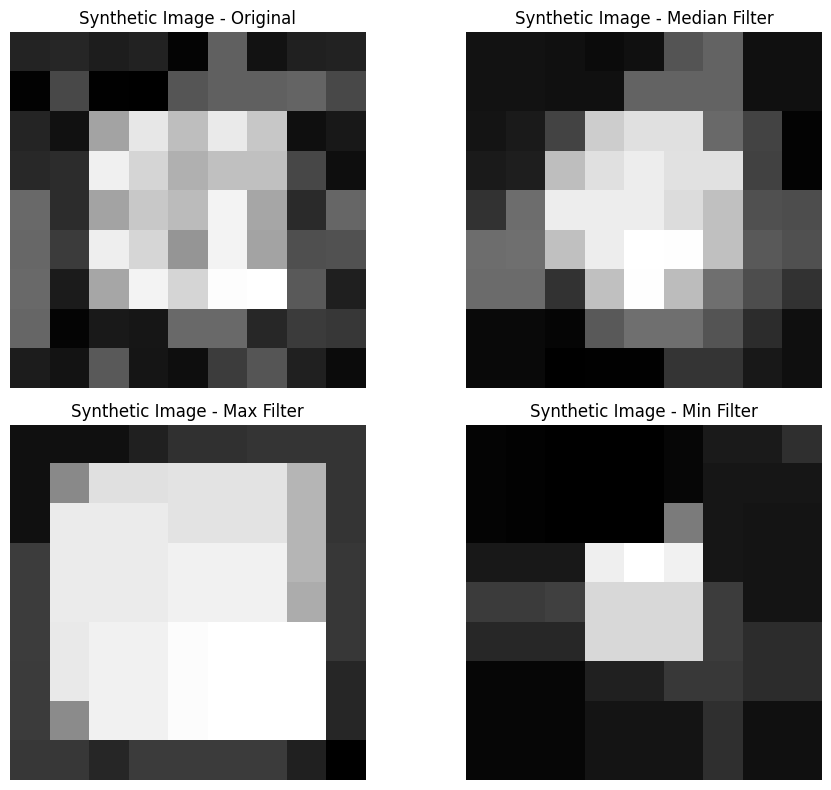

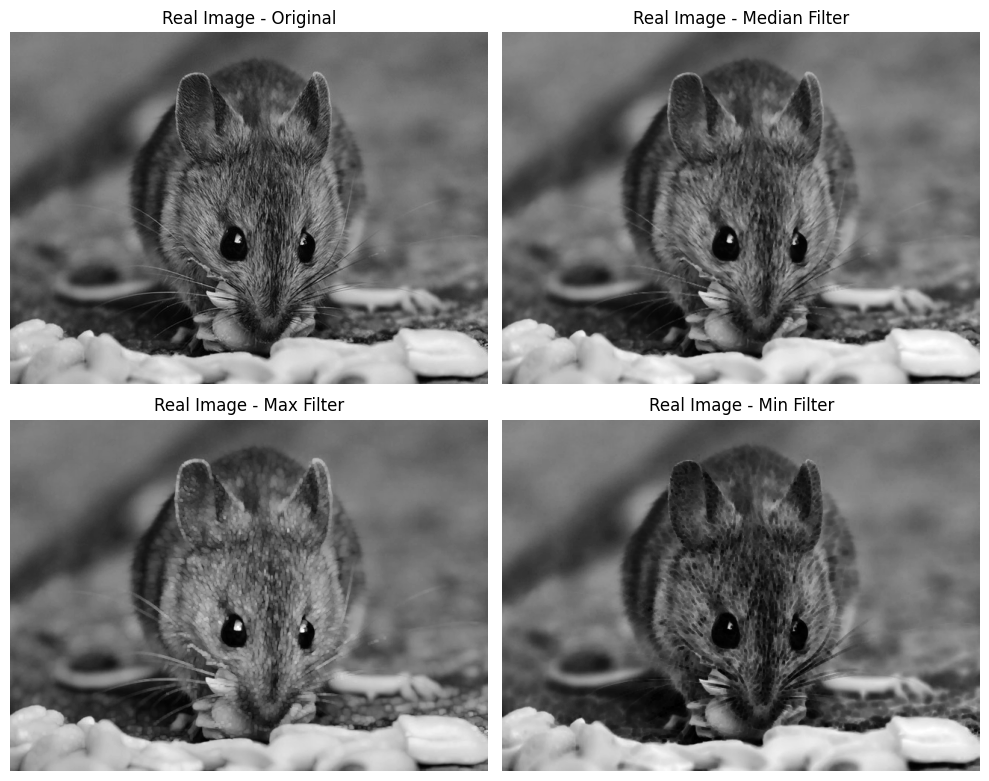

In [ ]:
# Main execution


# Process the synthetic noisy image
noisy_image = create_noisy_image()                 # Step 1: Create a noisy image
median_result, max_result, min_result = apply_filters(noisy_image)  # Step 2
display_results(noisy_image, median_result, max_result, min_result,
                title_prefix="Synthetic Image")    # Step 3


# Process the real image
image_path = r"C:\Users\Admin\Desktop\B23AI065_CVIP\CVIP\mouse.jpg"
real_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load real image

if real_image is not None:
    median_real, max_real, min_real = apply_filters(real_image)
    display_results(real_image, median_real, max_real, min_real,
                    title_prefix="Real Image")
else:
    print("Error: Could not read the image from the provided path.")